#NAME : *ANKITH VIJAY* 
#SID : *862394125*

#**H1.1** 
#Exercise 1.10 in AMLbook: 
Here is an experiment that illustrates the difference between a single bin and multiple bins. Run a computer simulation for flipping 1,000 fair coins. Flip each coin independently 10 times. Let’s focus on 3 coins as follows. c1 is the first coin flipped; crand is a coin you choose at random; cmin is the coin that had the minimum frequency of heads (pick the earlier one in case of a tie). Let ν1, νrand, and νmin be the fraction of heads you obtain for the respective
three coins. For a coin, let μ be its probability of heads.


(a) What is μ for the three coins selected?\
(b) Repeat this entire experiment a large number of times (e.g., 100,000 runs of the entire experiment)
to get several instances of ν1, νrand, and νmin and plot the histograms of the distributions of
ν1, νrand, and νmin. Notice that which coins end up being crand and cmin may differ from one
run to another.\
(c) Using part 1b plot estimates for P[|ν − μ| > ] as a function of , together with the Hoeffding
bound 2e
**−2**
2N on the same graph.

(d) Which coins obey the Hoeffding bound, and which do not? Explain why.

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def flip_coins(ttlcns):
    hdtl = np.random.randint(0, 2, size=ttlcns)
    return hdtl


def simulate(ttlcns, ttlfps, print_freq=False):
    hdtl_sum = np.zeros(ttlcns) 
    for flip in range(ttlfps):
        hdtl_sum += flip_coins(ttlcns)
    hdtl_freq = hdtl_sum / ttlfps

    v1, crand = hdtl_freq[0], np.random.choice(ttlcns)
    vrand = hdtl_freq[crand]
    cmin = np.argmin(hdtl_sum)
    vmin = hdtl_freq[cmin]

    if print_freq:
        print(f"Frequency of first coin: {v1}")
        print(f"Frequency of a random coin: id({crand})-freq({vrand})")
        print(f"Frequency of the coin with minimum frequency: id({cmin})-freq({vmin})")
    
    return v1, vrand, vmin


def hoeffding(observationservationsilon, n):
    return 2.0 * np.exp(-2.0 * n * observationsilon ** 2)


In [10]:
# Exercise 1.10 (a) 
ttlcns = 1000
ttlfps = 10
simulate(ttlcns, ttlfps, True)

Frequency of first coin: 0.5
Frequency of a random coin: id(712)-freq(0.4)
Frequency of the coin with minimum frequency: id(25)-freq(0.1)


(0.5, 0.4, 0.1)

(array([62367.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 37633.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <BarContainer object of 10 artists>)

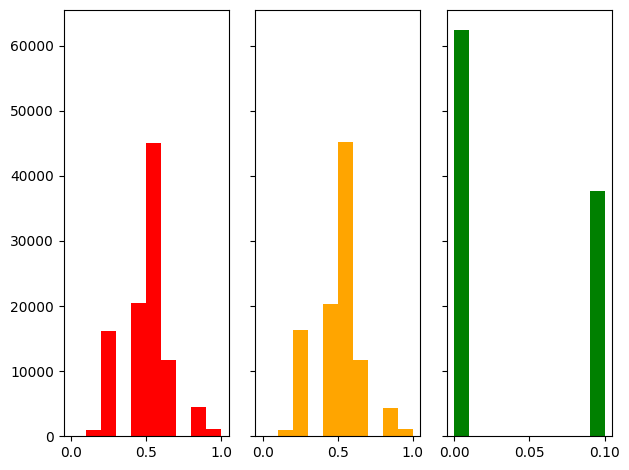

In [13]:
# Exercise 1.10 (b) 
ttlcns = 1000
ttlfps = 10
total_runs = 100000
v1s, vrands, vmins = [],[],[]
for run in range(total_runs):
    v1,vrand,vmin = simulate(ttlcns, ttlfps)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 10
axs[0].hist(v1s,bins=n_bins, color = "red" )
axs[1].hist(vrands,bins=n_bins, color = "orange")
axs[2].hist(vmins,bins=n_bins, color = "green" )

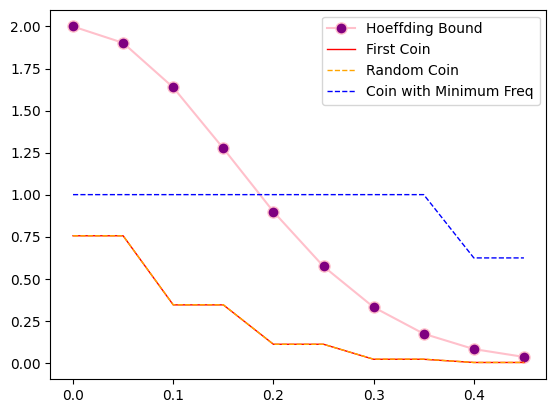

In [17]:
# Exercise 1.10 (c)
observations = np.arange(0.0,0.5,0.05)
bounds = hoeffding(observations, ttlfps)
v1s, vrands, vmins = np.array(v1s), np.array(vrands), np.array(vmins)
v1d = np.abs(v1s-0.5)
vrandd = np.abs(vrands-0.5)
vmind = np.abs(vmins-0.5)

p1, prand, pmin = np.zeros(len(observations)),np.zeros(len(observations)),np.zeros(len(observations))

for id in range(observations.shape[0]):
    ep = observations[id]
    p1[id] = np.sum(v1d > ep)/total_runs
    prand[id] = np.sum(vrandd > ep)/total_runs
    pmin[id] = np.sum(vmind > ep)/total_runs

#plt.ylim((0,0.01))    
plt.plot(observations, bounds, marker='o', markerfacecolor='purple', markersize=8, color='pink', label='Hoeffding Bound')
plt.plot(observations, p1, marker='', color='r', linewidth=1, label='First Coin')
plt.plot(observations, prand, marker='', color='orange', linewidth=1, linestyle='dashed', label='Random Coin')
plt.plot(observations, pmin, marker='', color='blue', linewidth=1, linestyle='dashed', label='Coin with Minimum Freq')
plt.legend()

--------------------------------------------------------------------------------

#**H1.2 Solution:**


#**Answer**
(a) 

P(A | R,B) = P(R,B | A) * P(A) / P(R,B)

where P(A | R,B) is the probability that we selected bin A given the selected balls are red and blue, P(R,B | A) is the probability of drawing a red and a blue ball from bin A, P(A) is the prior probability of selecting bin A, and P(R,B) is the probability of drawing a red and a blue ball regardless of which bin they came from.

P(R,B | A) = P(R | A) * P(B | A) = 0.3 * 0.7 = 0.21\
P(R,B | B) = P(R | B) * P(B | B) = 0.7 * 0.3 = 0.21\
P(A) = 4/10 = 0.4\
P(B) = 6/10 = 0.6\
P(R,B) = P(R,B | A) * P(A) + P(R,B | B) * P(B) = 0.21 * 0.4 + 0.21 * 0.6 = 0.21\
\
Therefore,

P(A | R,B) = P(R,B | A) * P(A) / P(R,B) = 0.21 * 0.4 / 0.21 = 0.4

Hence, the probability that we selected bin A given the selected balls are red and blue is 0.4.

(b) 

P(A | R,B) = P(R,B | A) * P(A) / P(R,B)

where P(R,B | A) is the probability of drawing a red and a blue ball from bin A, P(A) is the prior probability of selecting bin A, and P(R,B) is the probability of drawing a red and a blue ball regardless of which bin they came from.

We can calculate the probabilities as follows:

P(R,B | A) = P(R | A) * P(B | A) = 0.1 * 0.3 = 0.03\
P(R,B | B) = P(R | B) * P(B | B) = 0.4 * 0.2 = 0.08\
P(A) = 4/10 = 0.4\
P(B) = 6/10 = 0.6\
P(R,B) = P(R,B | A) * P(A) + P(R,B | B) * P(B) = 0.03 * 0.4 + 0.08 * 0.6 = 0.059

Therefore,

P(A | R,B) = P(R,B | A) * P(A) / P(R,B) = 0.03 * 0.4 / 0.059 = 0.203

Hence, the probability that we selected bin A given the selected balls are red and blue is 0.203.

--------------------------------------------------------------------------------

#**H1.3 Solution:** 

w = 2(μ+ - μ-)

Expanded below

w = 2(1/N+ - 1/N-) * ∑(xn, yn) where yn = +1 if xn belongs to class + and -1 otherwise.

where N+ is the number of samples in the positive class and N- is the number of samples in the negative class, and the sum is taken over all the training samples.

The bias term b is given by:

b = ||μ-||^2 - ||μ+||^2

Expanding it we get

b = (1/N- * ∑(xn, yn) ||xn||^2) - (1/N+ * ∑(xn, yn) ||xn||^2)

Combining it we get

(w^T)* x + b = 2(1/N+ - 1/N-) * ∑(xn, yn) (xn^T * x) + (1/N- * ∑(xn, yn) ||xn||^2) - (1/N+ * ∑(xn, yn) ||xn||^2)

In conclusion:

(w^T)* x + b = ∑(xn, yn) αn * (xn^T * x) + b

where αn = 2(1/N+ - 1/N-) if yn = +1 and αn = -2(1/N+ - 1/N-) if yn = -1.

Thus, we have shown that (w^T)* x + b can be written as a linear combination of the inner products between the training samples and the test sample, plus a constant bias term. The coefficients αn are determined by the class labels of the training samples and the number of samples in each class

#**H1.4 Solution:**

In [19]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784')


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [20]:
import numpy as np

def KNN(X_train, y_train, x_test, K):
    
    dists = np.linalg.norm(X_train - x_test, axis=1)
    id = np.argsort(dists)[:K]
    labels = y_train[id]
    return np.argmax(np.bincount(labels))

X = mnist.data.astype('float32')
y = mnist.target.astype('int')

id = np.isin(y, [1, 2, 7])
X = X[id]
y = y[id]

X_train = np.concatenate([X[y == i][:200] for i in range(3)])
y_train = np.concatenate([y[y == i][:200] for i in range(3)])
X_test = np.concatenate([X[y == i][200:] for i in range(3)])
y_test = np.concatenate([y[y == i][200:] for i in range(3)])

K = 1
y_pred_1 = np.array([KNN(X_train, y_train, x, K) for x in X_test])

K = 3
y_pred_3 = np.array([KNN(X_train, y_train, x, K) for x in X_test])

accuracy1 = np.mean(y_pred_1 == y_test)
accuracy3 = np.mean(y_pred_3 == y_test)

print(f"1-NN accuracy: {accuracy1:.4f}")
print(f"3-NN accuracy: {accuracy3:.4f}")


1-NN accuracy: 0.9778
3-NN accuracy: 0.9720


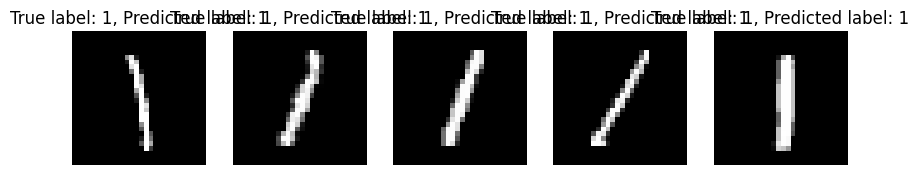

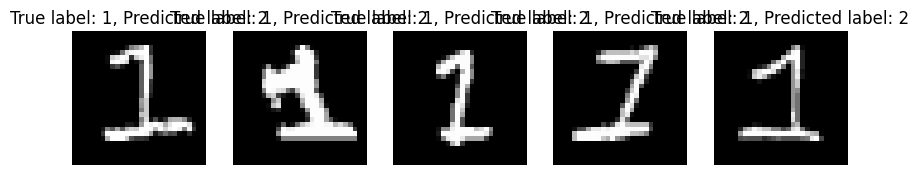

In [27]:
import matplotlib.pyplot as plt

corr = np.where(y_pred_1 == y_test)[0]
incorr = np.where(y_pred_1 != y_test)[0]

plt.figure(figsize=(10, 5))
for i, id in enumerate(corr[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[id].reshape(28, 28), cmap='gray')
    plt.title(f"True label: {y_test[id]}, Predicted label: {y_pred_1[id]}")
    plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
for i, id in enumerate(incorr[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[id].reshape(28, 28), cmap='gray')
    plt.title(f"True label: {y_test[id]}, Predicted label: {y_pred_1[id]}")
    plt.axis('off')
plt.show()


#**H1.5 Solution:**
NOTE: The housing file is on my local machine

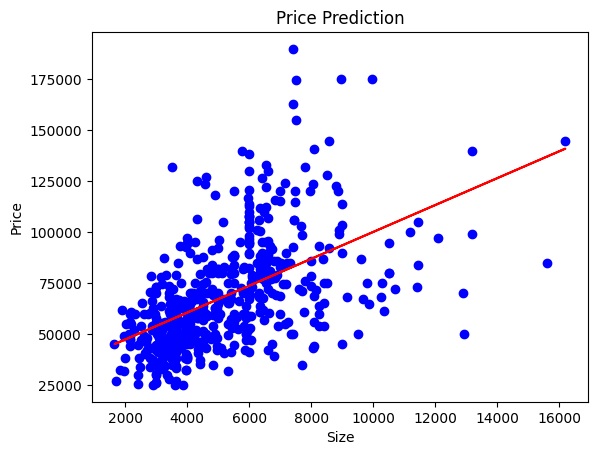

In [40]:
#Part 'a' solution
import matplotlib
# matplotlib.use('GTKAgg')

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

data = pd.read_csv("Housing.csv")

X = np.array(data["lotsize"])
Y = np.array(data["price"])

m1 = np.mean(X)
m2 = np.mean(Y)

n = len(X)

num = 0
denom = 0
for i in range(n):
    num += (X[i] - m1) * (Y[i] - m2)
    denom += (X[i] - m1) ** 2
b1 = num / denom
b0 = m2 - (b1 * m1)

plt.scatter(X, Y, color='blue')
Y_pred = b0 + b1*X
plt.plot(X, Y_pred, color='red')
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Price Prediction")
plt.show()

Y_pred = b0 + b1*X


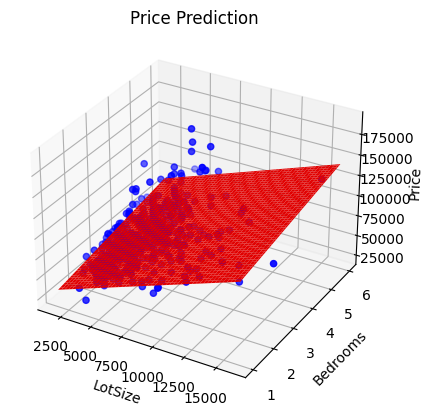

In [39]:
#Part 'b' Solution

# Split data into X (size, bedrooms, baths) and Y (price)
X = np.array(data[["lotsize", "bedrooms", "bathrms"]])
Y = np.array(data["price"])

# Add a column of ones to X for the intercept term
X = np.hstack((X, np.ones((len(X), 1))))

# Calculate the regression coefficients using normal equation
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# Plot the data points and the best fit plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='blue')
surfaceX, surfaceY = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), 
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
surfaceZ = w[0] * surfaceX + w[1] * surfaceY + w[2] * np.ones(surfaceX.shape)
ax.plot_surface(surfaceX, surfaceY, surfaceZ, color='red')
ax.set_xlabel('LotSize')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.title("Price Prediction")
plt.show()

# Compute the predicted price (Y) using the regression coefficients
Y_pred = X.dot(w)
